# Investigating the Movie Data set

In [1]:
#importing the needed package and libraries from python 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## Introduction to the Dataset

### Dataset Description

The movie data base, acronymned as __TMDb__, is a set of data that was extracted from the collection of different events which is stored online and accessed via the kaggle data source. This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue. The dataset is loaded from __('tmdb-movies.csv')__, located in the root folder as a downloaded document. The Data has a total of __10867__ rows and a total of __21__ columns.

### Columns Description

The Columns consist of:

- id
- imdb
- popularity
- revenue
- budget
- original_title
- release_year
- .
- .
- .
- (21)

### Questions

1. What is the average time that a movie last from start to finish while watching?
2. Which movie is the most popular movie and what year was it produced, which company produced it, who is/was the director and what is the title name for the movie and how long does it take to watch?
3. How many movies are produced by the director of the most popular movie?
4. What is the relationship between revenue and budget for each movie, between the popularity and budget, between runtime and vote, and correlation between revenue and popularity, between runtime and popularity?
5. Which movie has the highest ratings and which one has the highest  revenue?
6. In Which particular week was the most popular movie released?

In [2]:
# loading the dataset from the root folder

movie_data = pd.read_csv('tmdb-movies.csv')

## Data Wrangling

### Accessing the data

In [3]:
# Inspecting the data by checking for the column values and possible look of the data
movie_data.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [4]:
# further inpsection by checking, for inconsistency, duplicates and missing data
movie_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

From the above data some values are missing, some are inconsistent

In [5]:
# checking for the aggregated missing values
movie_data.isna().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

It was observed that some columns have missing data that are not advisable to proceed without

In [6]:
# creating a function that checks the percentage of missing value
def check_missing(missing_value_agg, proportion_base):
    '''This will check and return the value of missing item and return the missing proportion'''
    result = (missing_value_agg / proportion_base) * 100
    return result

In [7]:
# Implementing the function created above
check_missing(movie_data.isna().sum(), movie_data.shape[0])

id                       0.000000
imdb_id                  0.092030
popularity               0.000000
budget                   0.000000
revenue                  0.000000
original_title           0.000000
cast                     0.699429
homepage                72.979937
director                 0.404933
tagline                 25.989324
keywords                13.740107
overview                 0.036812
runtime                  0.000000
genres                   0.211669
production_companies     9.479109
release_date             0.000000
vote_count               0.000000
vote_average             0.000000
release_year             0.000000
budget_adj               0.000000
revenue_adj              0.000000
dtype: float64

From Inspection it was discovered that the homepage column has more than 72% of missing items, so it will be ideal to drop the column of homepage

In [8]:
# Dropping the home page columns
movie_data.drop('homepage', axis=1, inplace=True)

In [9]:
#Checking for duplicated items in the movie data
movie_data.duplicated().sum()

1

Since there is a unique identity to each of the data in the movie data frame and repetition might be an error, so it is Ideal to drop the particular duplicate

In [10]:
#Dropping the duplicated item(s) found 
movie_data.drop_duplicates(inplace=True)

In [11]:
#Re-inspecting the movie dataset using the created funtion
arg_1 = movie_data.isna().sum()
arg_2 = movie_data.shape[0]
check_missing(arg_1, arg_2)

id                       0.000000
imdb_id                  0.092039
popularity               0.000000
budget                   0.000000
revenue                  0.000000
original_title           0.000000
cast                     0.699494
director                 0.404970
tagline                 25.991717
keywords                13.741371
overview                 0.036815
runtime                  0.000000
genres                   0.211689
production_companies     9.479982
release_date             0.000000
vote_count               0.000000
vote_average             0.000000
release_year             0.000000
budget_adj               0.000000
revenue_adj              0.000000
dtype: float64

It was discovered that there are still some miising items, that accounts for a relatively low proportion of our movie dataset, there, we can replace it

In [12]:
# creating a function that can help us replace missing values
def replace_func(miss_col, replace_val):
    '''This will take individual items that has a missing a value and replace with new word'''
    replaced = movie_data[miss_col].fillna(replace_val, inplace=True)
    return replaced

In [13]:
#Lets check for the columns that have missing values
movie_data.isna().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

As seen above, the columns that have missing value are 8 in numbers, so will inplement our functions on them by replacing them with __unavail__

In [14]:
# Replacing the missing data with the function created
missing_col = 'imdb_id'
replace_value = 'unavail'
replace_func(missing_col, replace_value)

In [15]:
# Checking the missing items to ensure it has been resolved
movie_data.isna().sum()

id                         0
imdb_id                    0
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [16]:
replace_func('cast', 'unavail')
replace_func('director', 'unavail')
replace_func('tagline', 'unavail')
replace_func('keywords', 'unavail')
replace_func('overview', 'unavail')
replace_func('runtime', 'unavail')
replace_func('genres', 'unavail')
replace_func('production_companies', 'unavail')

In [17]:
movie_data.isna().sum()

id                      0
imdb_id                 0
popularity              0
budget                  0
revenue                 0
original_title          0
cast                    0
director                0
tagline                 0
keywords                0
overview                0
runtime                 0
genres                  0
production_companies    0
release_date            0
vote_count              0
vote_average            0
release_year            0
budget_adj              0
revenue_adj             0
dtype: int64

No missing value as that has been sorted as just as see above

In [18]:
# fixing inconsistent data
movie_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10865 non-null  int64  
 1   imdb_id               10865 non-null  object 
 2   popularity            10865 non-null  float64
 3   budget                10865 non-null  int64  
 4   revenue               10865 non-null  int64  
 5   original_title        10865 non-null  object 
 6   cast                  10865 non-null  object 
 7   director              10865 non-null  object 
 8   tagline               10865 non-null  object 
 9   keywords              10865 non-null  object 
 10  overview              10865 non-null  object 
 11  runtime               10865 non-null  int64  
 12  genres                10865 non-null  object 
 13  production_companies  10865 non-null  object 
 14  release_date          10865 non-null  object 
 15  vote_count         

As seen above, it can be seen that some data are inconsistent, just like that release_date

In [19]:
# format the release_year data
movie_data['release_date'] = pd.to_datetime(movie_data['release_date'])

In [20]:
#Checking for the effect
movie_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    10865 non-null  int64         
 1   imdb_id               10865 non-null  object        
 2   popularity            10865 non-null  float64       
 3   budget                10865 non-null  int64         
 4   revenue               10865 non-null  int64         
 5   original_title        10865 non-null  object        
 6   cast                  10865 non-null  object        
 7   director              10865 non-null  object        
 8   tagline               10865 non-null  object        
 9   keywords              10865 non-null  object        
 10  overview              10865 non-null  object        
 11  runtime               10865 non-null  int64         
 12  genres                10865 non-null  object        
 13  production_compa

In [21]:
# Getting the unique items in each of the columns
movie_data.nunique()

id                      10865
imdb_id                 10856
popularity              10814
budget                    557
revenue                  4702
original_title          10571
cast                    10720
director                 5068
tagline                  7998
keywords                 8805
overview                10848
runtime                   247
genres                   2040
production_companies     7446
release_date             5909
vote_count               1289
vote_average               72
release_year               56
budget_adj               2614
revenue_adj              4840
dtype: int64

Our data is now clean for consumption based on the insight we want to get for exploration

## EDA (Exploratory Data Analysis)

### Expectation

This part will communicate visually and statistical insights into the movie dataset that is being explored whcih will help us in gathering some thoughts around the questions that were asked from the onset


In [22]:
# A snap look into the dataset genreally, deduce observations
movie_data.describe(include='all')

C:\Users\lenovo\AppData\Local\Temp/ipykernel_13808/2373235613.py:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  movie_data.describe(include='all')


,id,imdb_id,popularity,budget,revenue,original_title,cast,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10865.000000,10865,10865.000000,1.086500e+04,1.086500e+04,10865,10865,10865,10865,10865,10865,10865.000000,10865,10865,10865,10865.000000,10865.000000,10865.000000,1.086500e+04,1.086500e+04
unique,NaN,10856,NaN,NaN,NaN,10571,10720,5068,7998,8805,10848,NaN,2040,7446,5909,NaN,NaN,NaN,NaN,NaN
top,NaN,unavail,NaN,NaN,NaN,Hamlet,unavail,Woody Allen,unavail,unavail,No overview found.,NaN,Comedy,unavail,2009-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN
freq,NaN,10,NaN,NaN,NaN,4,76,45,2824,1493,13,NaN,712,1030,28,NaN,NaN,NaN,NaN,NaN
first,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1972-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2071-12-29 00:00:00,NaN,NaN,NaN,NaN,NaN
mean,66066.374413,NaN,0.646446,1.462429e+07,3.982690e+07,NaN,NaN,NaN,NaN,NaN,NaN,102.071790,NaN,NaN,NaN,217.399632,5.975012,2001.321859,1.754989e+07,5.136900e+07
std,92134.091971,NaN,1.000231,3.091428e+07,1.170083e+08,NaN,NaN,NaN,NaN,NaN,NaN,31.382701,NaN,NaN,NaN,575.644627,0.935138,12.813260,3.430753e+07,1.446383e+08
min,5.000000,NaN,0.000065,0.000000e+00,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.000000,NaN,0.207575,0.000000e+00,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,90.000000,NaN,NaN,NaN,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00


In [23]:
# For more specific result let's just describe the numeric characters
movie_data.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10865.000000,10865.000000,1.086500e+04,1.086500e+04,10865.000000,10865.000000,10865.000000,10865.000000,1.086500e+04,1.086500e+04
mean,66066.374413,0.646446,1.462429e+07,3.982690e+07,102.071790,217.399632,5.975012,2001.321859,1.754989e+07,5.136900e+07
std,92134.091971,1.000231,3.091428e+07,1.170083e+08,31.382701,575.644627,0.935138,12.813260,3.430753e+07,1.446383e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.000000,0.207575,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20662.000000,0.383831,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75612.000000,0.713857,1.500000e+07,2.400000e+07,111.000000,146.000000,6.600000,2011.000000,2.085325e+07,3.370173e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


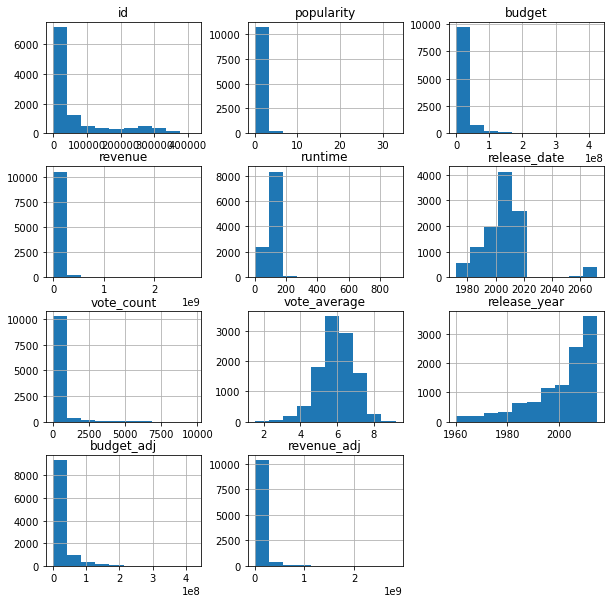

In [24]:
# A sneak peak into the distribution of our 
movie_data.hist(figsize=(10, 10));

From Inspection we can see the various distribution in the movie dataset being presented, and it is quite observable that only the __vote_average__ and __release_date__ follows a normal distribution, and it is evident enough that, more movies are produced as the year increase as shown by the distribution of the __release_year__

In [25]:
# To give an insight to question one asked above
average_runtime = movie_data['runtime'].mean()
average_runtime

102.07179015186378

In [26]:
# To make this more clear, we can create a function that converts the average runtime into a more communicable insight
def time_conv(runtime_value):
    '''This function helps take the runtime and convert it to a particular hour and remainder minute'''
    return f'{int(runtime_value//60)} hrs and {int(runtime_value%60)} mins'

In [27]:
time_conv(average_runtime)

'1 hrs and 42 mins'

It shows that the average runtime for the movie is __1 hour and 42 mins__

In [28]:
# To give an insight into the question 2 asked above
most_rated = movie_data[movie_data['popularity']==movie_data['popularity'].max()]
most_rated

,id,imdb_id,popularity,budget,revenue,original_title,cast,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09


In [29]:
most_rated['director']

0    Colin Trevorrow
Name: director, dtype: object

In [30]:
most_rated['original_title']

0    Jurassic World
Name: original_title, dtype: object

In [31]:
most_rated['production_companies']

0    Universal Studios|Amblin Entertainment|Legenda...
Name: production_companies, dtype: object

In [32]:
time_conv(most_rated.runtime)

'2 hrs and 4 mins'

In [33]:
most_rated['release_year']

0    2015
Name: release_year, dtype: int64

The insight above shows that __Jurassic World__ is the most popular movie, has the runtime of __2 hrs and 4 mins__ and was produced by __Universal Studios|Amblin Entertainment|Legenda...__ companies, directed by __Colin Trevorrow__ and was released in the year __2015__

In [34]:
most_revenue = movie_data[movie_data['revenue']==movie_data['revenue'].max()]
most_revenue

,id,imdb_id,popularity,budget,revenue,original_title,cast,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
1386,19995,tt0499549,9.432768,237000000,2781505847,Avatar,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,James Cameron,Enter the World of Pandora.,culture clash|future|space war|space colony|so...,"In the 22nd century, a paraplegic Marine is di...",162,Action|Adventure|Fantasy|Science Fiction,Ingenious Film Partners|Twentieth Century Fox ...,2009-12-10,8458,7.1,2009,2.408869e+08,2.827124e+09


In [35]:
most_revenue['original_title']

1386    Avatar
Name: original_title, dtype: object

The Above data shows that, __Avatar__ Generetad the most revenue and was produced in the __Second week of December, 2009__

In [36]:
for i in movie_data['director']:
    if i == 'Colin Trevorrow':
        print(i)

Colin Trevorrow
Colin Trevorrow


From the collection above, it was discovered that the produced 2 movies as the name only appears two times in the row

#### Measuring relationships with visuals and statistics

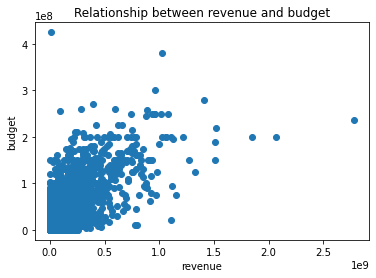

In [37]:
# Relationship between revenue and budget
def plotter(x_axis, y_axis):
    '''This will help us to plot the needed graph'''
    plt.scatter(x = movie_data[x_axis], y = movie_data[y_axis])
    plt.xlabel(x_axis)
    plt.ylabel(y_axis)
    plt.title(f'Relationship between {x_axis} and {y_axis}')
    
plotter('revenue', 'budget')

The above shows there might be a positive relationship between budget and revenue, the higher the budget, the higher the revenue tends to be

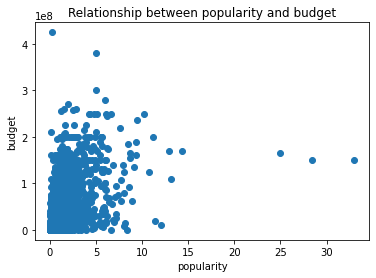

In [38]:
# Relationship between popularity and budget
plotter('popularity', 'budget')

The figure above does not show if there is any directional relationship between the variables measured, i.e popularity and budget

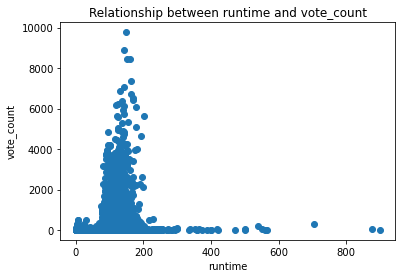

In [39]:
# Looking for relationship between the runtime and vote
plotter('runtime', 'vote_count')

This shows a symmetrical relationship between these two variables, one, does not affect the other, but rather, the effect shows that a vote is skewed to a particular runtime

In [40]:
# Checking for possible correlation
movie_data[['revenue', 'popularity', 'budget', 'runtime']].corr()

,revenue,popularity,budget,runtime
revenue,1.000000,0.663360,0.734928,0.162830
popularity,0.663360,1.000000,0.545481,0.139032
budget,0.734928,0.545481,1.000000,0.191300
runtime,0.162830,0.139032,0.191300,1.000000


C:\Users\lenovo\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0.5, 1.0, 'The distribution of the release year curve')]

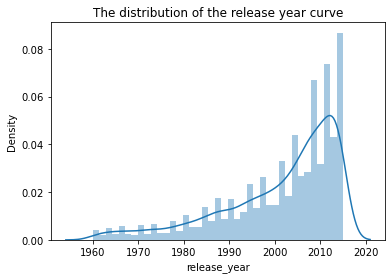

In [41]:
# Plotting the distribution of release year in a seaborn
release_year = movie_data['release_year']
release_year_plot = sns.distplot(release_year)
release_year_plot.set(title="The distribution of the release year curve")

This distribution shows that movie keep on increasing by the year and that is being adopted by movie enthusiast

In [42]:
# Checking the distribution of release year using blox plot
# release_year_box = sns.boxplot(movie_data['release_year'])
# release_year_box.set(title="The box plot of the distribution of the release year")

C:\Users\lenovo\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Text(0.5, 1.0, 'Popluarity growth of movies as per year')]

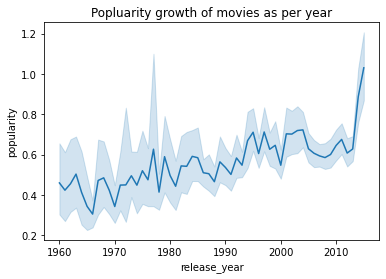

In [43]:
# Plotting possible trend, and checking for how popular the movie grows across the years
trend_plot = sns.lineplot( movie_data['release_year'], movie_data['popularity'] )
trend_plot.set(title="Popluarity growth of movies as per year")

The above plot shows that the popularity of movies grow across the years

## Conclusions

### Procedures taking
1. The data was downloaded from the data source.
2. Afterwhich the needed packages to use for exploring, wrangling, and communicating the visuals on the data were imported, packages like pandas, matplotlib and seaborn, were used.
3. The data was then accessed for possibilities of inconsistencies and incomplete records, 
4. The data was filtered and explored for analysis to be carried out
5. The __EDA__ was then carried out on the data

### Answers

After the __EDA__ was carried out, it was discovered that:
1. The Average time a movie last from start to finish while watching is __1hr 42 mins__.
2. The insight above shows that __Jurassic World__ is the most popular movie, has the runtime of __2 hrs and 4 mins__ and was produced by __Universal Studios|Amblin Entertainment|Legenda...__ companies, directed by __Colin Trevorrow__ and was released in the year __2015__.
3. From the collection above, it was discovered that the producer produced 2 movies as the name only appears two times on the row.
4. There might be a positive relationship between __budget__ and __revenue__, the higher the budget, the higher the revenue tends to be. Also, the figure above does not show if there is any directional relationship between __popularity__ and __budget__. And lastly, for __vote_counts__ and __runtime__, the plot shows a symmetrical relationship between these two variables, one, does not affect the other, but rather, the effect shows that vote count is skewed to a particular runtime.
5. According to the data explored, there is tendency correlation between __popularity__ and __revenue__ which stands at __0.66__ and on the other end there might not be enough a correlation between __runtime__ and __popularity__, because the correlation test stands at __0.14__ approximately.
6. The Above data shows that, __Avatar__ Generetad the most revenue and was produced in the __Second week of December, 2009__



### Limitations
. The data seems to be behind in terms of years, cos various blockbusters movies has been released afterwards
. With the new streaming rate, the data seems to communicate less of the generation Z adoption of movie watching